## NAMA : RAFI AUDI PRAYOGA
## KELAS : SK5A
## NIM      : 09011181722001

## MODEL PERILAKU BERJALAN AGEN-AGEN MENGGUNAKAN  FUZZY LOGIC 
 

Perilaku sebuah agen yang natural atau mampu merespon lingkungan adalah tujuan yang dikembangkan oleh  para game developer. Logika fuzzy adalah salah satu metode yang mampu menangkap kondisi lingkungan yang tidak diskrit. Penelitian ini menjelaskan model perilaku kecepatan berjalan sejumlah agen yang mendapat pengaruh dari lingkungannya.

## 1.METODE FUZZY YANG AKAN DIGUNAKAN

Disini saya menggunakan Metode fuzzy  Mamdani. Langkah-langkah dalam metode mamdani, antara lain:  
1. Pembentukan Himpunan Fuzzy
2. Aplikasi Fungsi Implikasi
3. Komposisi Aturan
4. Defuzifikasi

# Import Library

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

Dalam Paper ini terdapat 3 input dan 1 output

Input :

1.Kelompok :
    - kecil (1-25)
    - Sedang (10-40)
    - Besar (26-45)
2.Stamina :
    - Lemah (1-5)
    - Normal (2-8)
    - Kuat (6-10)
3.Kondisi :
    - Tenang (1-50)
    - Normal (20-80)
    - Kacau (51-100)

Output

Kecepatan :
    - Lambat (1-3,5)
    - Sedang (3-4)
    - Cepat (
    
    
    

## Fuzifikasi Kelompok

Dalam Keanggotan Kelompok mempunyai rentan dari 1 sampai 45

Dan inilah fungsi keanggotaannya

Dengan fungsi keanggotaan Kelompok

\begin{equation}
  Kelompok['Kecil'] = \mu KelKecil(x)=\begin{cases}
    (25 - x)/(25 - 5) , ;&  {x \leq 23}.\\
    0, & \text{$x\geq 25$}.
  \end{cases}
  \\
  Kelompok['Sedang'] = \mu KelSedang(x)=\begin{cases}
    0; & \text{$x\leq 10$ atau $x\geq40$}.\\
    (x - 10)/(25 - 10) , & \text{$10 \leq x \leq 25$}.\\
    (25 - x)/(40 - 25) , & \text{$10 \leq x \leq 40$}.\\
  \end{cases}
  \\
  \\
    Kelompok['Besar'] = \mu Kelbesar(x)=\begin{cases}
    0, & \text{$x\leq 25$}.\\
    (x - 25)/(40 - 10) , & \text{$25 \leq x \leq 40$}.\\
    1, & \text{$x\geq 45$}.
  \end{cases}
\end{equation}



In [2]:
Kelompok = ctrl.Antecedent(np.arange(1,46,1), 'Kelompok')
Kelompok_x = np.arange(1,46,1)

Disitu Kita menggunakan Antecedent.Antecedent disini berfungsi sebagai fungsi untuk Input yang dalam hal ini adalah Kelompok

In [3]:
#Fungsi Keanggotaan Kelompok
Kelompok['Kecil'] = fuzz.trimf(Kelompok.universe, [1, 1, 25])
Kelompok['Sedang'] = fuzz.trimf(Kelompok.universe, [10, 25,40])
Kelompok['Besar'] = fuzz.trimf(Kelompok.universe, [25, 45,45])

## PLOTING MEMBERSHIP DARI KELOMPOK

Text(0.5,1,'Kelompok Kecil')

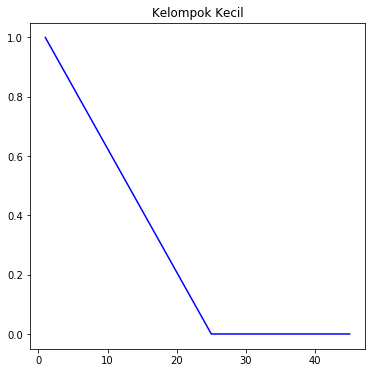

In [4]:
Kelompok_kecil = fuzz.trimf(Kelompok_x,[1, 1, 25])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Kelompok_x,Kelompok_kecil,'blue')
ax0.set_title('Kelompok Kecil')

Text(0.5,1,'Kelompok Sedang')

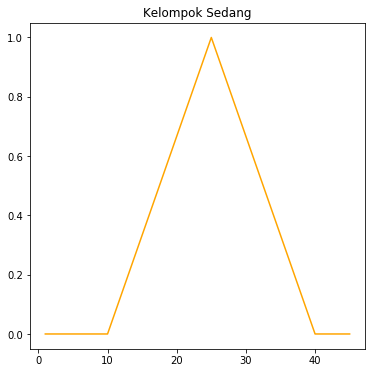

In [5]:
Kelompok_sedang = fuzz.trimf(Kelompok_x,[10, 25,40])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Kelompok_x,Kelompok_sedang,'orange')
ax0.set_title('Kelompok Sedang')

Text(0.5,1,'Kelompok Besar')

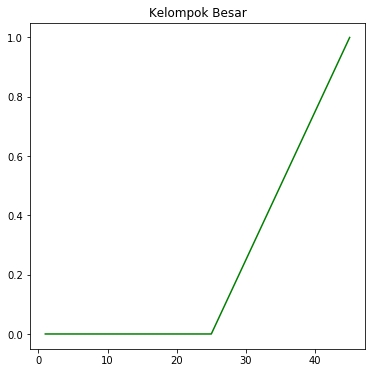

In [6]:
Kelompok_Besar = fuzz.trimf(Kelompok_x,[25, 45,45])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Kelompok_x,Kelompok_Besar,'green')
ax0.set_title('Kelompok Besar')

C:\Users\RAFI\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


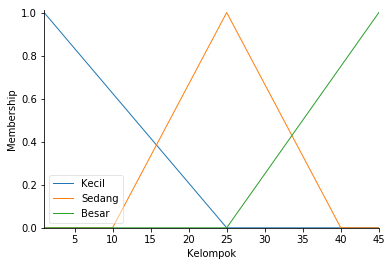

In [7]:
Kelompok.view()

## Fuzifikasi Stamina

Dengan fungsi keanggotaan Stamina

\begin{equation}
  Stamina['Lemah'] = \mu StmLemah(x)=\begin{cases}
    (5 - x)/(5 - 1) , ;& \text{$1 \leq x \leq 5$}.\\
    0, & \text{$x\geq 5$}.
  \end{cases}
  \\
  Stamina['Normal'] = \mu StmNormal(x)=\begin{cases}
    0; & \text{$x\leq 2$ atau $x\geq8$}.\\
    (x - 2)/(5 - 2) , & \text{$2 \leq x \leq 5$}.\\
    (8 - x)/(8 - 5) , & \text{$5 \leq x \leq 8$}.\\
  \end{cases}
  \\
  \\
    Stamina['Kuat'] = \mu StmKuat(x)=\begin{cases}
    0, & \text{$x\leq 5$}.\\
    (x - 5)/(10 - 5) , & \text{$5 \leq x \leq 10$}.\\
    1, & \text{$x\geq 10$}.
  \end{cases}
\end{equation}



In [8]:
Stamina = ctrl.Antecedent(np.arange(1,11,1), 'Stamina')
Stamina_x = np.arange(1,11,1)

In [9]:
#fungsi keanggotaan Stamina
Stamina['Lemah'] = fuzz.trimf(Stamina.universe, [1, 1, 5])
Stamina['Normal'] = fuzz.trimf(Stamina.universe, [2, 5, 8])
Stamina['Kuat'] = fuzz.trimf(Stamina.universe, [5, 10, 10])

## PLOTTING MEMBERSHIP DARI STAMINA


Text(0.5,1,'Stamina Lemah')

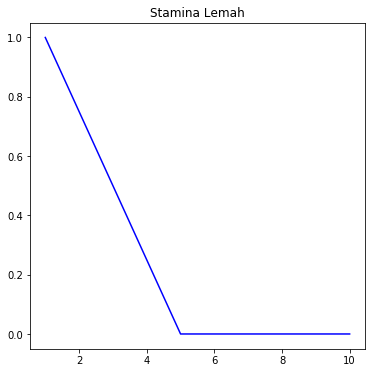

In [10]:
Stamina_Lemah = fuzz.trimf(Stamina_x,[1, 1, 5])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Stamina_x,Stamina_Lemah,'blue')
ax0.set_title('Stamina Lemah')

Text(0.5,1,'Stamina Normal')

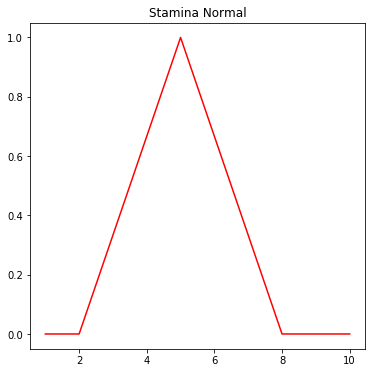

In [11]:
Stamina_Normal = fuzz.trimf(Stamina_x,[2, 5, 8])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Stamina_x,Stamina_Normal,'red')
ax0.set_title('Stamina Normal')

Text(0.5,1,'Stamina Kuat')

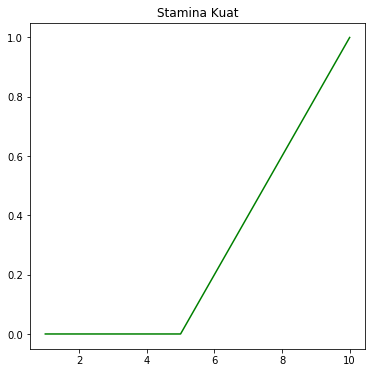

In [12]:
Stamina_Kuat = fuzz.trimf(Stamina_x,[5, 10, 10])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Stamina_x,Stamina_Kuat,'green')
ax0.set_title('Stamina Kuat')

C:\Users\RAFI\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


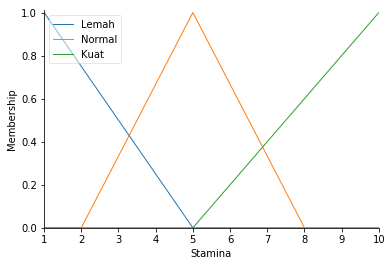

In [13]:
Stamina.view()

## Fuzifikasi Kondisi

Dengan fungsi keanggotaan Kondisi

\begin{equation}
  Kondisi[Tenang'] = \mu KndTenang(x)=\begin{cases}
    (50 - x)/(50 - 1) , ;& \text{$1 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50$}.
  \end{cases}
  \\
  Kondisi['Normal'] = \mu KndNormal(x)=\begin{cases}
    0; & \text{$x\leq 20$ atau $x\geq80$}.\\
    (x - 20)/(50 - 20) , & \text{$20 \leq x \leq 50$}.\\
    (50 - x)/(80 - 50) , & \text{$50\leq x \leq 80$}.\\
  \end{cases}
  \\
  \\
    Kondisi['Besar'] = \mu KndBesar(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}

In [14]:
Kondisi = ctrl.Antecedent(np.arange(1,101,1), 'Kondisi')
Kondisi_x = np.arange(1,101,1)

In [15]:
#Fungsi Keanggotaan Kondisi
Kondisi['Tenang'] = fuzz.trimf(Kondisi.universe, [1, 1,50])
Kondisi['Normal'] = fuzz.trimf(Kondisi.universe, [20, 50,80])
Kondisi['Kacau'] = fuzz.trimf(Kondisi.universe, [50, 100,100])

Text(0.5,1,'Kondisi Tenang')

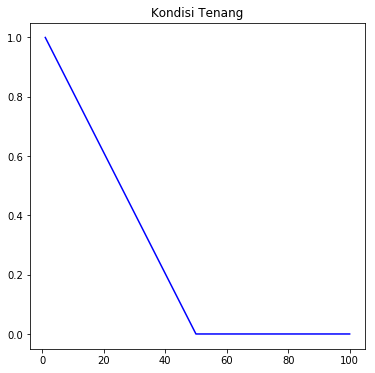

In [16]:
Kondisi_Tenang = fuzz.trimf(Kondisi_x,[1, 1,50])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Kondisi_x,Kondisi_Tenang,'blue')
ax0.set_title('Kondisi Tenang')

Text(0.5,1,'Kondisi Normal')

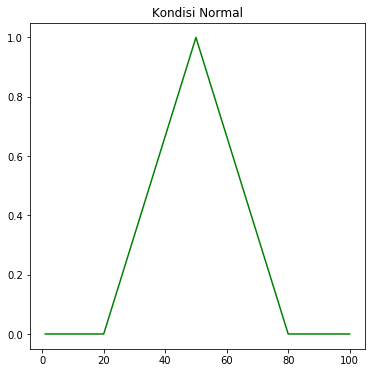

In [17]:
Kondisi_Normal = fuzz.trimf(Kondisi_x,[20, 50,80])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Kondisi_x,Kondisi_Normal,'green')
ax0.set_title('Kondisi Normal')

Text(0.5,1,'Kondisi Kacau')

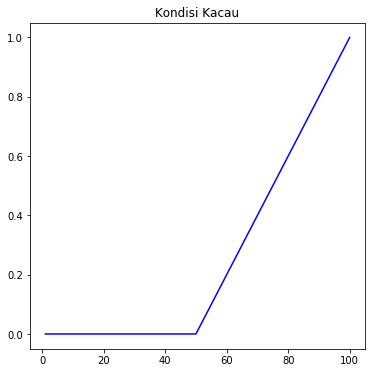

In [18]:
Kondisi_Kacau = fuzz.trimf(Kondisi_x,[50, 100,100])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Kondisi_x,Kondisi_Kacau,'blue')
ax0.set_title('Kondisi Kacau')

C:\Users\RAFI\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


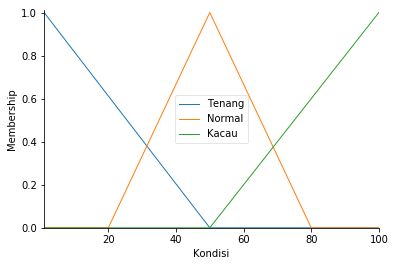

In [19]:
Kondisi.view()

## Fuzifikasi Kecepatan

Dengan fungsi keanggotaan Kondisi

\begin{equation}
  Kecepatan[Lambat'] = \mu KecLambat(x)=\begin{cases}
     0; & \text{$x\leq 2.5$ atau $x\geq3.5$}.\\
    (x - 2.5)/(3.5 - 2.5) , ;& \text{$2.5 \leq x \leq 3$}.\\
    (3.5 - x)/(3.5 - 3) , ;& \text{$3 \leq x \leq 3.5$}
  \end{cases}
  \\
  Kondisi['Normal'] = \mu KndNormal(x)=\begin{cases}
    0; & \text{$x\leq 3$ atau $x\geq4$}.\\
    (x - 3)/(3.5 - 3) , & \text{$3 \leq x \leq 3.5$}.\\
    (4 - x)/(4 - 3.5) , & \text{$3.5\leq x \leq 4$}.\\
  \end{cases}
  \\
  \\
    Kondisi['Besar'] = \mu KndBesar(x)=\begin{cases}
    0, & \text{$x\leq 3.5$}.\\
    (x - 3.5)/(5.5 - 3.5) , & \text{$3.5 \leq x \leq 5.5$}\\
    1, & \text{$x\geq 5.5$}.
  \end{cases}
\end{equation}

# Plotting Membership dari Kecepatan

In [20]:
Kecepatan = ctrl.Consequent(np.arange(1,6.5,0.5),'kecepatan')
Kecepatan_x = np.arange(1,6.5,0.5)

Kenapa di kecepatan kita memakai consequent,karna di dalam hal ini kecepatan adalah output nya,dan consequent di peruntukan untuk sebuah output

In [21]:
#Fungsi Keanggotaan Kecepatan
Kecepatan['Lambat'] = fuzz.trimf(Kecepatan.universe, [2.5, 3,3.5])
Kecepatan['Sedang'] = fuzz.trimf(Kecepatan.universe, [3, 3.5,4])
Kecepatan['Cepat'] = fuzz.trimf(Kecepatan.universe, [3.5, 5.5,5.5])

Text(0.5,1,'Kecepatan Lambat')

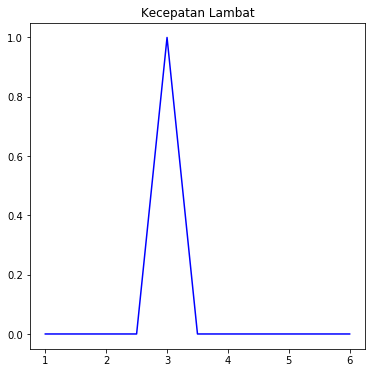

In [22]:
Kecepatan_Lambat = fuzz.trimf(Kecepatan_x,[2.5, 3,3.5])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Kecepatan_x,Kecepatan_Lambat,'blue')
ax0.set_title('Kecepatan Lambat')

Text(0.5,1,'Kecepatan Sedang')

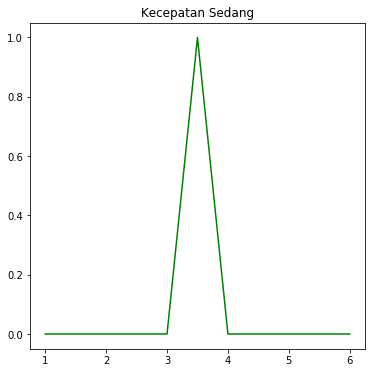

In [23]:
Kecepatan_Sedang = fuzz.trimf(Kecepatan_x,[3, 3.5,4])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Kecepatan_x,Kecepatan_Sedang,'green')
ax0.set_title('Kecepatan Sedang')

Text(0.5,1,'Kecepatan Cepat')

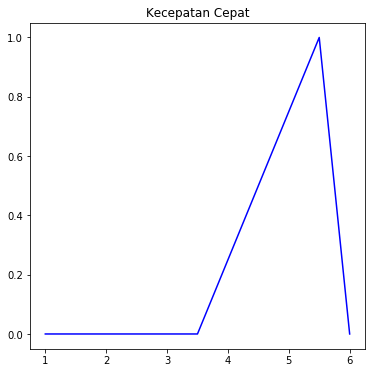

In [24]:
Kecepatan_Cepat = fuzz.trimf(Kecepatan_x,[3.5, 5.5,5.5])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Kecepatan_x,Kecepatan_Cepat,'blue')
ax0.set_title('Kecepatan Cepat')

## Rules Base

Di rule base ini,kita melakukan yang namanya pengelompokan dari input sehingga menghasilkan output yang sudah ada

In [25]:
rule1 = ctrl.Rule(Kelompok['Kecil'] & Stamina['Lemah'],Kecepatan['Lambat'])
rule2 = ctrl.Rule(Kelompok['Kecil'] & Stamina['Normal'],Kecepatan['Sedang'])
rule3 = ctrl.Rule(Kelompok['Kecil'] & Stamina['Kuat'],Kecepatan['Cepat'])
rule4 = ctrl.Rule(Kelompok['Sedang'] & Stamina['Lemah'],Kecepatan['Lambat'])
rule5 = ctrl.Rule(Kelompok['Sedang'] & Stamina['Normal'],Kecepatan['Sedang'])
rule6 = ctrl.Rule(Kelompok['Sedang'] & Stamina['Kuat'],Kecepatan['Cepat'])
rule7 = ctrl.Rule(Kelompok['Besar'] & Stamina['Lemah'],Kecepatan['Lambat'])
rule8 = ctrl.Rule(Kelompok['Besar'] & Stamina['Normal'],Kecepatan['Sedang'])
rule9 = ctrl.Rule(Kelompok['Besar'] & Stamina['Kuat'],Kecepatan['Cepat'])
rule10 = ctrl.Rule(Kelompok['Kecil'] & Kondisi['Tenang'],Kecepatan['Lambat'])
rule11 = ctrl.Rule(Kelompok['Kecil'] & Kondisi['Normal'],Kecepatan['Sedang'])
rule12 = ctrl.Rule(Kelompok['Kecil'] & Kondisi['Kacau'],Kecepatan['Cepat'])
rule13 = ctrl.Rule(Kelompok['Sedang'] & Kondisi['Tenang'],Kecepatan['Lambat'])
rule14 = ctrl.Rule(Kelompok['Sedang'] & Kondisi['Normal'],Kecepatan['Sedang'])
rule15 = ctrl.Rule(Kelompok['Sedang'] & Kondisi['Kacau'],Kecepatan['Cepat'])
rule16 = ctrl.Rule(Kelompok['Besar'] & Kondisi['Tenang'],Kecepatan['Lambat'])
rule17 = ctrl.Rule(Kelompok['Besar'] & Kondisi['Normal'],Kecepatan['Sedang'])
rule18 = ctrl.Rule(Kelompok['Besar'] & Kondisi['Kacau'],Kecepatan['Cepat'])

## Rule Evaluation

In [26]:
Kecepatan_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])

In [27]:
Kecepatann = ctrl.ControlSystemSimulation(Kecepatan_ctrl)

In [28]:
Kecepatann.input['Kelompok'] = 16
Kecepatann.input['Stamina'] = 6
Kecepatann.input['Kondisi'] = 42

In [29]:
Kecepatann.compute()

In [30]:
print(Kecepatann.output['kecepatan'])

4.1387110144069945


C:\Users\RAFI\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


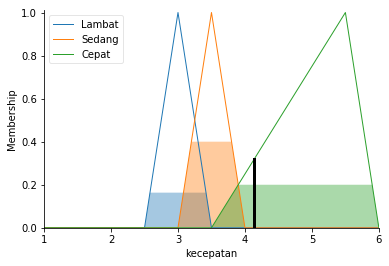

In [31]:
Kecepatan.view(sim=Kecepatann)

# Perhitungan Manual

Setelah melakukan perhitungan menggunakan metode fuzzy di phyton dan mendapatkan hasil nya,sekarang kita akan melakukan nya kembali dengan metode perhitungan manual dan akan membandingkan hasil dari perhitungan phyton dengan perhitungan manual.Apakah akan sama atau berbeda...

### Kelompok = 16
### Masukan Nilai Kelompok kedalam fungsi keanggotan Kelompok


\begin{equation}
  Kelompok['Kecil'] = \mu KelKecil(x)=\begin{cases}
    (25 - x)/(25 - 5) , ;&  {x \leq 23}.\\
    0, & \text{$x\geq 25$}.
  \end{cases}
  \\
  Kelompok['Sedang'] = \mu KelSedang(x)=\begin{cases}
    0; & \text{$x\leq 10$ atau $x\geq40$}.\\
    (x - 10)/(25 - 10) , & \text{$10 \leq x < 25$}.\\
    (25 - x)/(40 - 25) , & \text{$10 < x \leq 40$}.\\
  \end{cases}
  \\
  \\
    Kelompok['Besar'] = \mu Kelbesar(x)=\begin{cases}
    0, & \text{$x\leq 25$}.\\
    (x - 25)/(40 - 10) , & \text{$25 \leq x < 40$}.\\
    1, & \text{$x\geq 45$}.
  \end{cases}
\end{equation}



\begin{equation}
    \mu KelompokKecil(16) = (25 - 16) / (25 - 5) \\
    \mu KelompokKecil(16) = 0.45 \\ 
    \mu KelompokSedang(16) = (16-10) / (25-10) \\
    \mu KelompokSedang(16) = 0,4 \\
    \mu KelompokSedang(16) = (25 - 16) / (40-25) \\
    \mu KelompokSedang(16) = 0.6 \\
\end{equation}

#### Stamina = 6
#### Masukan Nilai Stamina Kedalam Fungsi Keanggotaan Stamina

\begin{equation}
  Stamina['Lemah'] = \mu StmLemah(x)=\begin{cases}
    (5 - x)/(5 - 1) , ;& \text{$1 \leq x \leq 5$}.\\
    0, & \text{$x\geq 5$}.
  \end{cases}
  \\
  Stamina['Normal'] = \mu StmNormal(x)=\begin{cases}
    0; & \text{$x\leq 2$ atau $x\geq8$}.\\
    (x - 2)/(5 - 2) , & \text{$2 \leq x < 5$}.\\ 
    (8 - x)/(8 - 5) , & \text{$5 < x \leq 8$}.\\ 
  \end{cases}
  \\
  \\
    Stamina['Kuat'] = \mu StmKuat(x)=\begin{cases}
    0, & \text{$x\leq 5$}.\\
    (x - 5)/(10 - 5) , & \text{$5 \leq x < 10$}.\\
    1, & \text{$x\geq 10$}.
  \end{cases}
\end{equation}



\begin{equation}
    \mu StaminaNormal(6) = (8 - 6) / ( 8 - 5) \\
    \mu StaminaNormal(6) = 0.666 \\ 
    \mu StaminaKuat(6) = ( 6 - 5 ) / (10 - 5)  \\
    \mu StaminaKuat(6) = 0.2 \\
\end{equation}

#### Kondisi = 42
#### Masukan nilai kondisi ke Setiap fungsi keanggotaan kondisi

\begin{equation}
  Kondisi[Tenang'] = \mu KndTenang(x)=\begin{cases}
    (50 - x)/(50 - 1) , ;& \text{$1 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50$}.
  \end{cases}
  \\
  Kondisi['Normal'] = \mu KndNormal(x)=\begin{cases}
    0; & \text{$x\leq 20$ atau $x\geq80$}.\\
    (x - 20)/(50 - 20) , & \text{$20 \leq x < 50$}.\\
    (50 - x)/(80 - 50) , & \text{$50 < x \leq 80$}.\\
  \end{cases}
  \\
  \\
    Kondisi['Besar'] = \mu KndBesar(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}

\begin{equation}
    \mu KondisiTenang(42) = (50 - 42) / ( 50 - 1) \\
    \mu KondisiTenang(42) = 0.163 \\ 
    \mu KondisiNormal(42) = ( 42 - 20 ) / (50 - 20)  \\
    \mu KondisiNormal(42) = 0.8 \\
\end{equation}

# Rule Evaluation

1.Kelompok Kecil(0,45)& StaminaNormal (0,666) = Kecepatan Sedang (0,45)

2.Kelompok Kecil(0,45)& StaminaKuat (0,2) = Kecepatan Cepat (0,2)

3.Kelompok Kecil(0,45)& KondisiTenang(0,163) = Kecepatan Lambat (0,163)

4.Kelompok Kecil(0,45)& KondisiNormal(0,8) = Kecepatan Sedang (0,45)

5.Kelompok Sedang(0,4)& StaminaNormal(0,66) = Kecepatan Sedang (0,4)

6.Kelompok Sedang(0,4)& StaminaKuat (0,2) = Kecepatan Cepat (0,2)

7.Kelompok Sedang(0,4)& KondisiTenang(0,163) = Kecepatan Lambat(0,4)

8.Kelompok Sedang(0,4)& KondisiNormal(0,8) = Kecepatan Sedang (0,4)

9.Kelompok Sedang(0,6)& StaminaNormal(0,66) = Kecepatan Sedang (0,6)

10.Kelompok Sedang(0,6)& StaminaKuat(0,2) = Kecepatan Cepat (0,2)

11.Kelompok Sedang(0,6)& KondisiTenang(0,163) = Kecepatan Lambat(0,6)

12.Kelompok Sedang(0,6)& KondisiNormal(0,8) = Kecepatan Sedang (0,6)



# Agregrasi

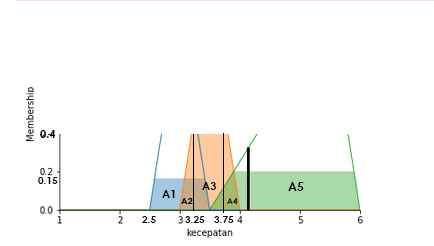

# Pertama yang harus dicari adalah Luas daerah A1,A2,A3,A4,A5

A1 Berbentuk Persegi jadi rumusnya adalah $P x L$

A1 :$P x L$

     =0,5 x 0,15
     =0,075

A2 Berbentuk Segitiga jadi Rumusnya Adalah $\frac{1}{2}(axb)$


A2 =$\frac{1}{2}(0.25x0.4)$

   =0,05

A3 Berbentuk Persegi Jadi Rumusnya Adalah P x L

A3 :0,5 x 0,4

   :0,2

A4 Berbentuk Segitiga jadi Rumusnya $\frac{1}{2}(axb)$

A4 :$\frac{1}{2}(0.25x0.4)$

    =0.05



A5 Berbentuk Persegei Jadi Rumusnya Adalah $P x L$

A5 :$2 x 0,2$

   :$0,4$

# Yang kedua kita akan mencari nilai tengah dari A1,A2,A3,A4 dan A5

Adapun Rumus Dari Mencari Nilai Tengah adalah
persegi : $\frac{1}{2}(a+b)$

Segitiga Atas  : xi : $a +\frac{2}{3}(b-a)$

Segitiga Bawah : xi : $a +\frac{1}{3}(b-a)$

X1 berbentuk persegi jadi rumusnya adalah persegi : $\frac{1}{2}(a+b)$

  : persegi : $\frac{1}{2}(2.5+3)$

  : $2.75$


X2 berbentuk Segitiga Atas jadi rumus nya adalah $a +\frac{2}{3}(b-a)$

=$3 +\frac{2}{3}(3.25-3)$

=$3 +\frac{2}{3}(0.25)$

=$3 + 0,1667$

=$3.1667$

X3 berbentuk Persegi jadi rumusnya adalah $a +\frac{1}{3}(b-a)$

=$a +\frac{1}{2}(3.25+3.75)$

=$a +\frac{1}{2}(7)$

=$3.5$

X4 berbentuk Segitiga Bawah jadi rumus nya adalah $a +\frac{1}{3}(b-a)$

=$3.75 +\frac{1}{3}(4-3.75)$

=$3.75 + 0.083$

=$3.833$

X5 berbentuk Persegi Jadi rumus nya adalah $\frac{1}{2}(a+b)$

=$\frac{1}{2}(4+6)$

=$5$

## Setelah kita sudah mencari nilai luas dan nilai tengah dari masing masing daerah,maka kita akan mencari nilai akhir dengan memakai rumus

$$Hasil = \frac{ \sum A_i X_i }
{\sum A_i }$$

Ai = Luas Daerah dari setiap daerah

Xi = Nilai tengah dari setiap daerah

$$= \frac{ \sum( A_1 \times X_1) + (A_2 \times X_2) + (A_3 \times X_3) + (A_4 \times X_5) + (A_5 \times X_5) }
{ A_1 + A_2 + A_3 + A_4 + A_5}$$

$$= \frac{ ( 2.75 \times 0.075) + (3.167 \times 0.05) + (3.5 \times 0.2) + (3.833 \times 0.05) + (5 \times 0.4) }
{ 0.075 + 0.05 + 0.2 + 0.05 + 0.4}$$

$$= \frac{ 0.20625 + 0.15835 + 0.7 + 0.19165 + 2 }
{ 0.775}$$

$$= \frac{ 3.25625 }
{ 0.775}$$

$$= 4.2016129\, $$

Setelah mendapatkan hasilnya,kita bisa lihat bahwa hasil perhitungan bila kita memakai phyton akan mendapatkan hasil sebesar 4.1387110144069945 dan ketika menghitung manual hasil yang didapatkan adalah 4.2016129

Terdapat selisih sebesar 0.0629018856